In [11]:
# Cargamos las librerias necesarias

import cv2
import numpy as np
import matplotlib.pyplot as plt

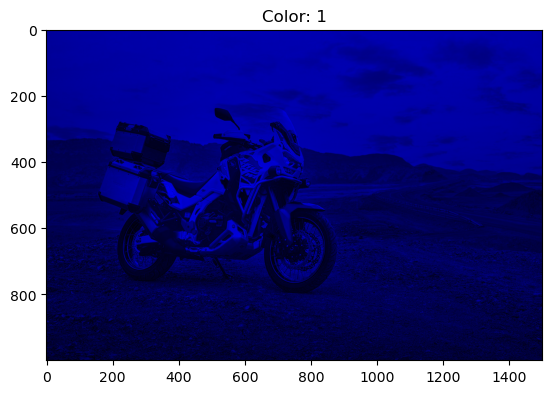

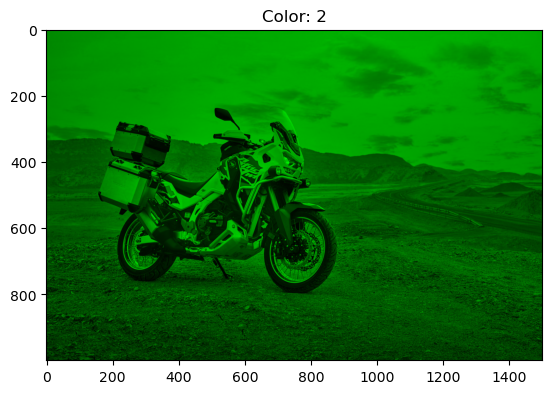

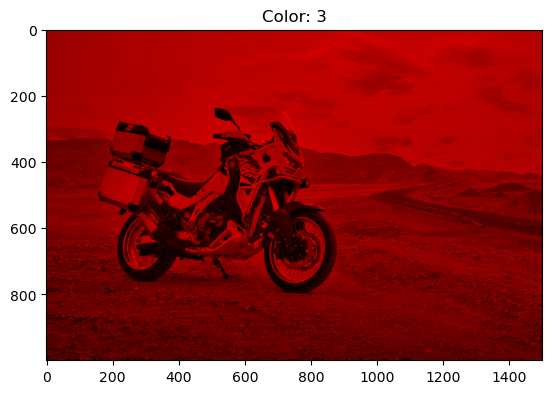

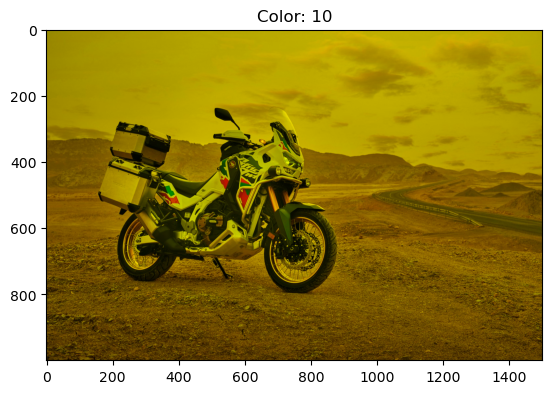

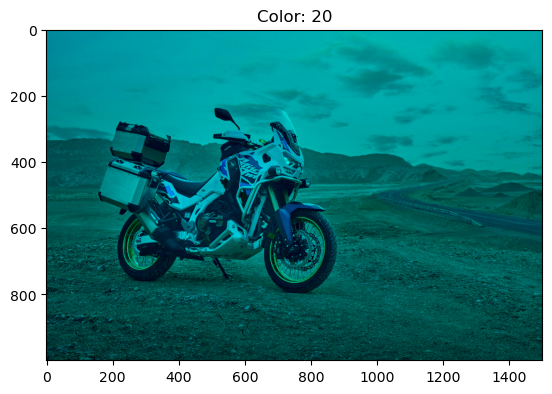

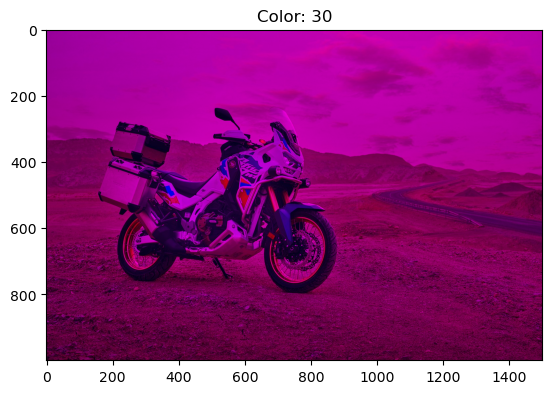

In [10]:
def activar_canales(imagen, color):
    # Creamos una copia de la imagen original
    resultado = imagen.copy()
    
    # Creamos una máscara para cada color
    mask_azul = np.zeros_like(imagen)
    mask_verde = np.zeros_like(imagen)
    mask_rojo = np.zeros_like(imagen)
    
    mask_azul[:, :, 0] = imagen[:, :, 0]
    mask_verde[:, :, 1] = imagen[:, :, 1]
    mask_rojo[:, :, 2] = imagen[:, :, 2]
    
    if color == 1:
        resultado = mask_azul
    elif color == 2:
        resultado = mask_verde
    elif color == 3:
        resultado = mask_rojo
    elif color == 10:
        resultado = mask_verde + mask_rojo
    elif color == 20:
        resultado = mask_verde + mask_azul
    elif color == 30:
        resultado = mask_azul + mask_rojo
    
    return resultado

# Cargamos la imagen de prueba
imagen = cv2.imread('africa_twin.jpg')

# Mostramos resultado para cada valor de color
for i in [1, 2, 3, 10, 20, 30]:
    imagen_resultado = activar_canales(imagen, i)
    plt.imshow(cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB))
    plt.title(f'Color: {i}')
    plt.show()

### Problema 2

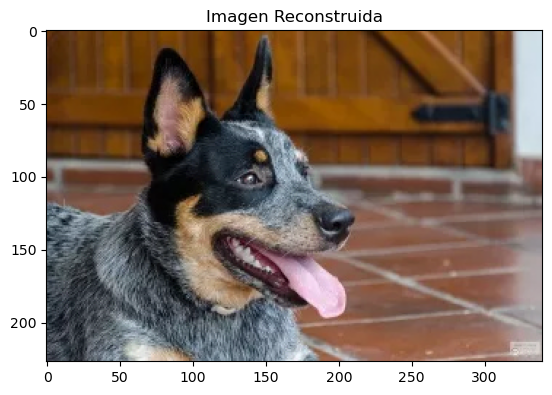

In [5]:
def reconstruir_imagen_color(imagen1, imagen2, imagen3):
    
    # Para asegurarnos que las imagenes tienen las mismas dimensiones
    assert imagen1.shape == imagen2.shape == imagen3.shape, "Las imágenes deben tener las mismas dimensiones"
    
    # Creamos una imagen en color con las imágenes en escala de grises
    imagen_color = cv2.merge((imagen1, imagen2, imagen3))
    
    return imagen_color

# Cargamos las imágenes de prueba en escala de grises
imagen1 = cv2.imread('perro_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE) # canal azul
imagen2 = cv2.imread('perro_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE) # canal verde
imagen3 = cv2.imread('perro_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)   # canal rojo

# Reconstruimos la imagen en color
imagen_color = reconstruir_imagen_color(imagen1, imagen2, imagen3) # El orden puede depender de cómo fueron guardadas originalmente

# Mostramos el resultado
plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
plt.title('Imagen Reconstruida')
plt.show()


### Problema 3

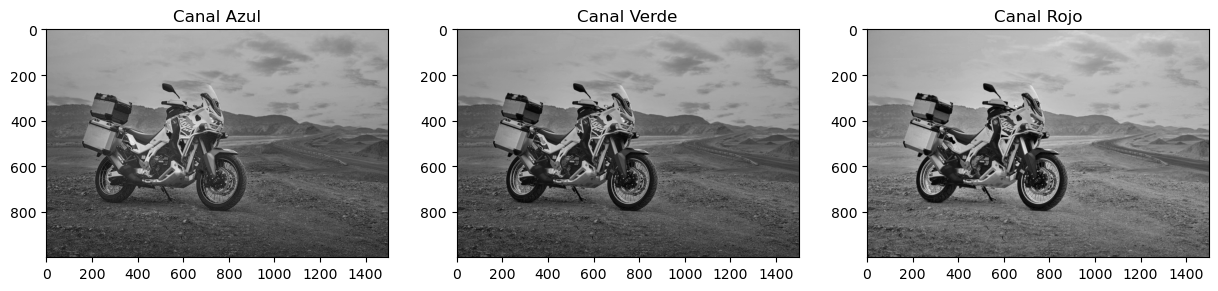

In [6]:
def escala_grises_3d(imagen):
    # Separamos los canales de color
    azul, verde, rojo = cv2.split(imagen)
    
    return azul, verde, rojo

# Cargamos la imagen de prueba
imagen = cv2.imread('africa_twin.jpg')

# Obtenemos las escalas de grises en 3D
azul, verde, rojo = escala_grises_3d(imagen)

# Mostramos los resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(azul, cmap='gray')
plt.title('Canal Azul')

plt.subplot(1, 3, 2)
plt.imshow(verde, cmap='gray')
plt.title('Canal Verde')

plt.subplot(1, 3, 3)
plt.imshow(rojo, cmap='gray')
plt.title('Canal Rojo')

plt.show()

### Problema 4

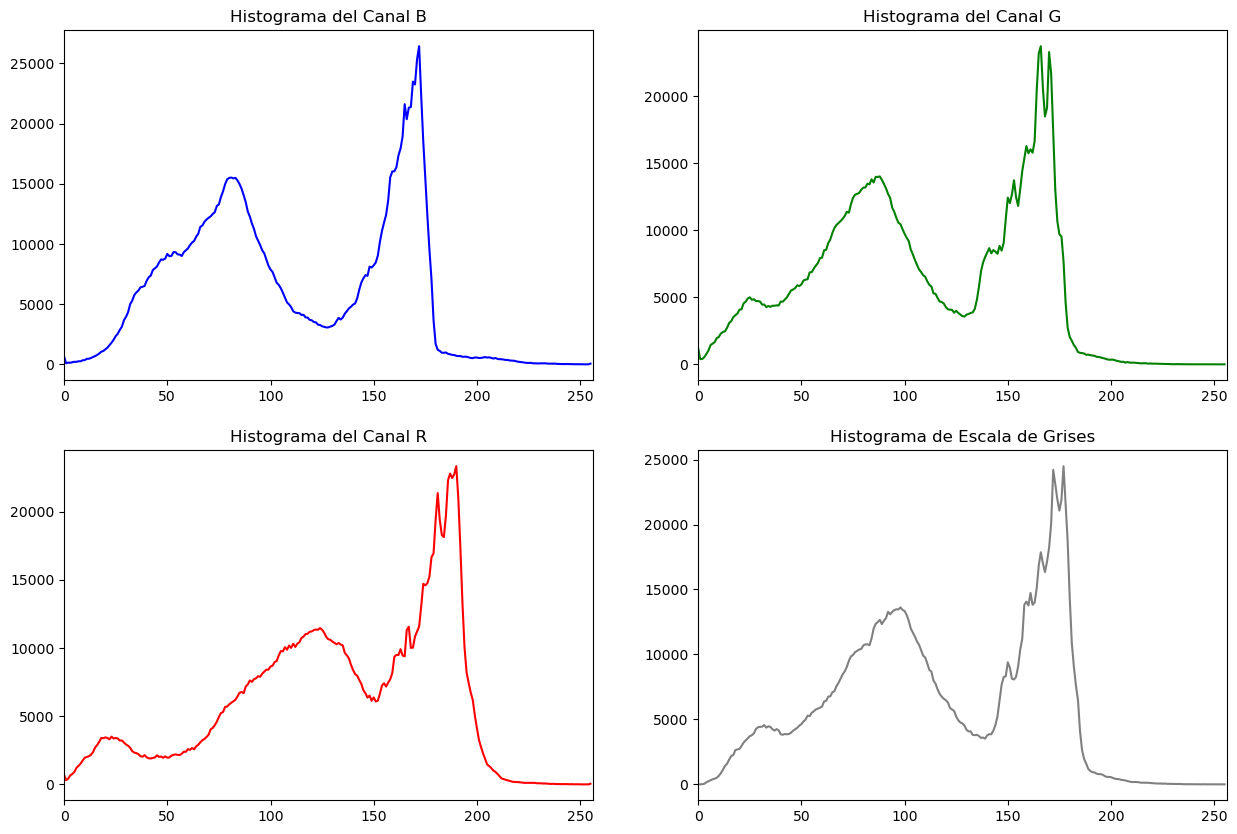

In [8]:
def mostrar_histogramas(imagen):
    # Calculamos los histogramas
    colores = ('b', 'g', 'r')
    plt.figure(figsize=(15, 10))
    
    for i, color in enumerate(colores):
        hist = cv2.calcHist([imagen], [i], None, [256], [0, 256])
        plt.subplot(2, 2, i + 1)
        plt.plot(hist, color=color)
        plt.title(f'Histograma del Canal {color.upper()}')
        plt.xlim([0, 256])
        plt.axvline(x=np.mean(hist), color='k', linestyle='dashed', linewidth=1)
    
    # Convertimos la imagen a escala de grises
    gris = np.mean(imagen, axis=2).astype(np.uint8)
    hist_gris = cv2.calcHist([gris], [0], None, [256], [0, 256])
    
    plt.subplot(2, 2, 4)
    plt.plot(hist_gris, color='gray')
    plt.title('Histograma de Escala de Grises')
    plt.xlim([0, 256])
    plt.axvline(x=np.mean(hist_gris), color='k', linestyle='dashed', linewidth=1)
    
    plt.show()

# Cargamos la imagen de prueba
imagen = cv2.imread('africa_twin.jpg')

# Mostramos los histogramas
mostrar_histogramas(imagen)

### Problema 5

El enfoque de escala de grises ponderado es una técnica crucial para la conversión de imágenes en color a escala de grises, especialmente en aplicaciones que requieren una percepción precisa del brillo y la luminosidad, como en la visión por computadora y el procesamiento de imágenes. Usar pesos que reflejen la sensibilidad del ojo humano a diferentes colores garantiza una representación más precisa y útil de la imagen en escala de grises.

Los pesos comúnmente utilizados son:

Rojo (R): 0.2989
Verde (G): 0.5870
Azul (B): 0.1140

La fórmula general para convertir un píxel (R, G, B) a escala de grises usando el enfoque ponderado es:

Gris = 0.2989𝑅 + 0.5870𝐺 + 0.1140𝐵


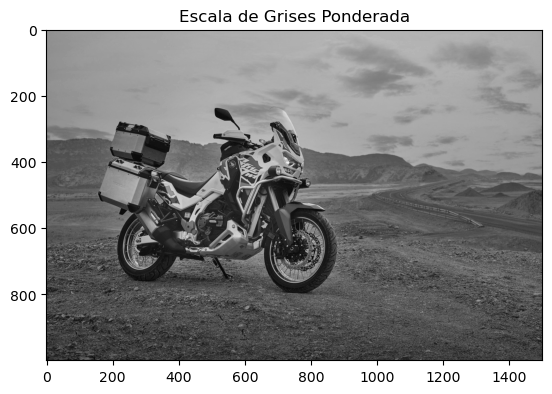

In [9]:
def escala_grises_ponderada(imagen):
    # Usar pesos para cada canal
    pesos = [0.2989, 0.5870, 0.1140]
    gris_ponderado = np.dot(imagen[..., :3], pesos)
    
    return gris_ponderado

# Cargar la imagen de prueba
imagen = cv2.imread('africa_twin.jpg')

# Obtener la imagen en escala de grises ponderada
imagen_gris_ponderada = escala_grises_ponderada(imagen)

# Mostrar el resultado
plt.imshow(imagen_gris_ponderada, cmap='gray')
plt.title('Escala de Grises Ponderada')
plt.show()

### Problema 6

Espacio de Color HSV

El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que se basa en la percepción humana de los colores. Los tres componentes del espacio HSV son:

- **Hue (Matiz):** Representa el tipo de color y se mide en grados de 0 a 360. Por ejemplo, 0 grados es rojo, 120 grados es verde y 240 grados es azul.
- **Saturation (Saturación):** Representa la intensidad del color y varía de 0 a 100%. Un valor de 0% significa que el color es un tono de gris, mientras que 100% es el color completo.
- **Value (Valor):** Representa el brillo del color y también varía de 0 a 100%. Un valor de 0% es siempre negro, y 100% corresponde al brillo completo del color.

El espacio de color HSV es útil en muchas aplicaciones porque separa la información de color (Hue) de la información de intensidad (Value), lo que facilita tareas como la detección de objetos en visión por computadora.

Para mapear colores al espacio HSV, se pueden usar las funciones de OpenCV:

```python
# Convertir una imagen de BGR a HSV
imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)